In [17]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import warnings
from sklearn.datasets import make_classification
import warnings
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [ ]:
df = pd.read_csv("data_file.csv")
cols_to_drop = ['FileName', 'md5Hash']
df = df.drop(columns=cols_to_drop)
columns = ["Machine", "DebugSize", "NumberOfSections", "SizeOfStackReserve", "MajorOSVersion", "BitcoinAddresses"]
for col in columns:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes
df.drop_duplicates(keep='last')
df.to_csv("data_filenew.csv")

In [ ]:
from sklearn.datasets import make_classification
X = df.iloc[:, 1:-1].values
Y = df.iloc[:, -1].values
X, y = make_classification(n_samples = 62486,n_features=15, n_classes=2)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy :",)
print(accuracy_score(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
Benign = ['0','1']
print(classification_report(y_test, y_pred, target_names=Benign))
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, index=Benign, columns=Benign)

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

# Create a figure and set its font properties
plt.figure(figsize=(10, 8))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20

# Generate the heatmap with seaborn
heatmap = sn.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

# Set plot properties
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted Labels', fontsize=20)
plt.ylabel('True Labels', fontsize=20)

# Save the plot as a high-quality PDF file
plt.savefig('confusion_matrix_NASNetMobile.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from keras.models import  Sequential
from keras.layers import Dense
import keras.activations,keras.losses
import numpy as np
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

In [3]:
lab=LabelEncoder()
data=pd.read_csv('final.csv')
print(data.columns)
print(data.info())
print(data.isna().sum())
print(data.describe())

Index(['Time', 'Protcol', 'Flag', 'Family', 'Clusters', 'SeddAddress',
       'ExpAddress', 'BTC', 'USD', 'Netflow_Bytes', 'IPaddress', 'Threats',
       'Port', 'Prediction'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149043 entries, 0 to 149042
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Time           149043 non-null  int64 
 1   Protcol        149043 non-null  object
 2   Flag           149043 non-null  object
 3   Family         149043 non-null  object
 4   Clusters       149043 non-null  int64 
 5   SeddAddress    149043 non-null  object
 6   ExpAddress     149043 non-null  object
 7   BTC            149043 non-null  int64 
 8   USD            149043 non-null  int64 
 9   Netflow_Bytes  149043 non-null  int64 
 10  IPaddress      149043 non-null  object
 11  Threats        149043 non-null  object
 12  Port           149043 non-null  int64 
 13  Prediction     149043 non

In [4]:
new=[]
for i in data.select_dtypes(include='object').columns.values:
    if len(data[i].value_counts().values) < 10:
        new.append(i)

In [5]:
lab=LabelEncoder()
for i in data[new]:
    data[i]=lab.fit_transform(data[i])
print(data['Family'].value_counts())

Family
Locky               25062
SamSam              19657
WannaCry            16110
JigSaw              13712
Flyper              12014
DMALocker           11360
APT                  9730
CryptXXX             9335
Razy                 7862
Globe                7373
EDA2                 6054
TowerWeb             4381
Cryptohitman         4134
NoobCrypt            1248
CryptoLocker          788
CryptoLocker2015      150
Globev3                73
Name: count, dtype: int64


111976


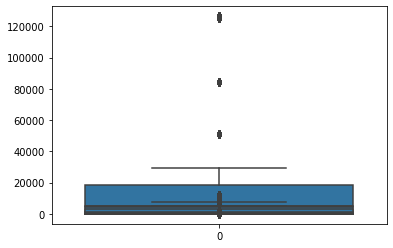

In [6]:
for i in data.select_dtypes(include='number').columns.values:
    sn.boxplot(data[i])
#     plt.show()

info={}
for i in data.select_dtypes(include='number').columns.values:
    data['z-scores']=(data[i]-data[i].mean())/data[i].std()
    outlier=np.abs(data['z-scores'] >3).sum()
    if outlier >0:
        info[i]=outlier
threshold=2
for x,y in info.items():
    upper=data[x].mean()+threshold*data[x].std()
    lower=data[x].mean()-threshold*data[x].std()
    data=data[(data[x]>lower)&(data[x]<upper)]
print(len(data))

In [7]:
data['Family']=lab.fit_transform(data['Family'])
values={}
for i in data.columns.values:
    cnt=0
    corri=data.corr()[i]
    corri=corri.drop(['z-scores',i])
    for j in corri.index:
        if corri[j] <0:
            cnt +=1

    values[i]=cnt
print(values)

{'Time': 9, 'Protcol': 8, 'Flag': 6, 'Family': 6, 'Clusters': 10, 'SeddAddress': 7, 'ExpAddress': 5, 'BTC': 9, 'USD': 8, 'Netflow_Bytes': 6, 'IPaddress': 5, 'Threats': 9, 'Port': 7, 'Prediction': 9, 'z-scores': 9}


<Axes: >

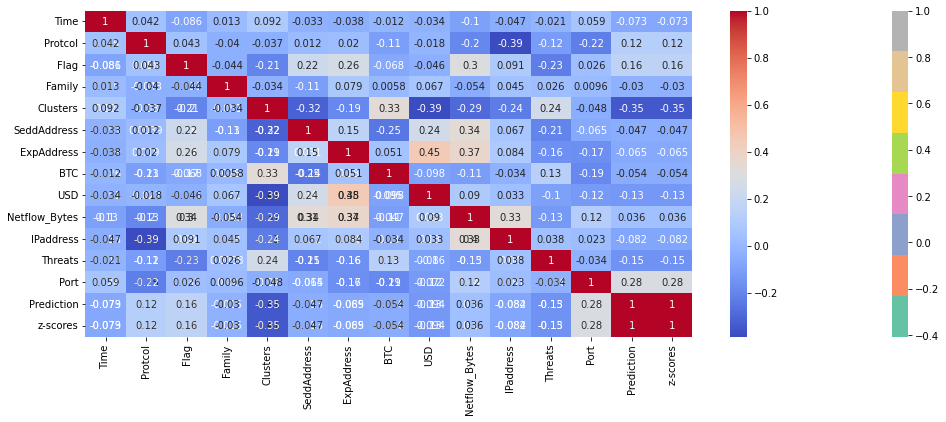

In [9]:
plt.figure(figsize=(17, 6))
corr = data.corr(method='spearman')
my_m = np.triu(corr)
sn.heatmap(corr, mask=my_m, annot=True, cmap="Set2")


correlation_matrix = data.corr()
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


In [18]:
x=[]
y=[]
print("The prediction for FLAG column in data set")
corri = data.corr()['Flag']
corri = corri.drop(['z-scores', 'Flag'])
x_train,x_test,y_train,y_test=train_test_split(data[corri.index],data['Flag'])

X_train, X_test, y_train, y_test = train_test_split(data[corri.index],data['Flag'])
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy :",)
print(accuracy_score(y_test, y_pred))

The prediction for FLAG column in data set
Accuracy :
0.9982139029792099


In [20]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[ 332    0    0    0    0   21    0    0    0]
 [   0 9255    0    0    0    0    0    6    0]
 [   0    0 1794    0    0    0    2    0    0]
 [   0    0    0 1186    0    0    0    0    0]
 [   0    0    0    0 3829    0    0    0    0]
 [  15    0    0    0    0 3510    0    0    0]
 [   0    0    0    0    0    0 2671    0    0]
 [   0    6    0    0    0    0    0 1750    0]
 [   0    0    0    0    0    0    0    0 3617]]
